In [51]:
import xgboost as xgb
import pandas as pd
import xgb_param as xp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split , GridSearchCV
import numpy as np

In [52]:
train = pd.read_csv('../data/train_new.csv')
test = pd.read_csv('../data/test_new.csv')
result = pd.read_csv('../data/result.csv')

In [53]:
# train.drop([635,1059,1212,1497,1525,1919,1567],axis=0,inplace=True)
train.drop(1567,axis=0,inplace=True)

In [54]:
train.reset_index(drop=True,inplace=True)

In [55]:
train.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','ｽｶﾊﾟｰ','BS-TBS','address','referee','home_01', 'home_02','home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08','home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','lat','lng','year','station','地方局','absorp','week_absorb','stadium','home_stadium','away_stadium','stage'],axis=1,inplace=True)

test.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','ｽｶﾊﾟｰ','BS-TBS','address','referee','home_01', 'home_02',  'home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','lat','lng','year','station','地方局','absorp','week_absorb','stadium','home_stadium','away_stadium','stage'],axis=1,inplace=True)

In [56]:
train['absorp_rate'] = train['y']/train['capa']

In [57]:
y = train['absorp_rate']
x = train.drop(['id','y','absorp_rate'],axis=1)

In [58]:
result['capa'] = test['capa']
result['absorp_rate'] = result['y']/result['capa']

In [59]:
def fmean_squared_error(ground_truth, predictions):
    fmean_squared_error_ = mean_squared_error(ground_truth, predictions)**0.5
    return fmean_squared_error_

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=17)

params = {'learning_rate': 0.4, 'max_depth':3, 'min_child_weight': 3, 'n_estimators':100, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'reg:squarederror'}

model = xgb.XGBRegressor(**params)
model.fit(X_train,y_train,eval_metric='rmse')

pred = model.predict(X_test)
# for i in range(len(pred)):
#     if pred[i] > np.percentile(pred,97):
#        pred[i] = np.percentile(pred,97)

print('RMSE : %.3f' % (np.sqrt(mean_squared_error(y_test,pred))))

RMSE : 0.104


In [61]:
pred = model.predict(test.drop(['id'],axis=1))
b_line = 97
border = np.percentile(pred,b_line)
for i in range(len(pred)):
    if pred[i] >= border:
        pred[i] = border

np.sqrt(mean_squared_error(result['absorp_rate'],pred))

0.10448443956362366

In [62]:
b_line = 97
border = np.percentile(pred,b_line)
for i in range(len(pred)):
    if pred[i] >= border:
        pred[i] = border
        
res = pred*result['capa']

np.sqrt(mean_squared_error(result['y'],res))

2865.843030010087

In [68]:
# plt.plot(res)

In [69]:
# plt.figure(figsize=(36, 18)) 
# sns.heatmap(train.drop(['id'],axis=1).corr(), vmax=1, vmin=-1, center=0, cmap="coolwarm", annot=True, )
# plt.show()

In [70]:
# fig, ax = plt.subplots(7, 5,figsize=(40,20))
# for i, col in enumerate(train.drop(['id'],axis=1).columns):
#    sns.scatterplot(x=col, y="y", ax=ax[i//5][i%5], data = train.drop(['id'],axis=1))
# plt.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 38632 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 26228 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38632 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26228 missing from current f

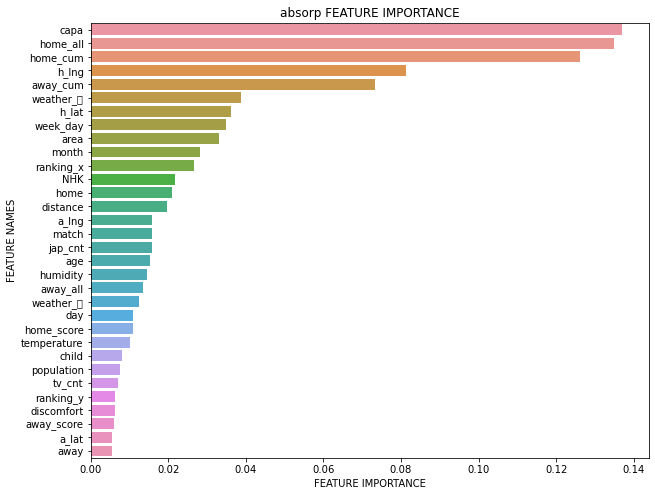

In [71]:
import reg_analysis as ra
ra.plot_feature_importance(model.feature_importances_,x.columns,'absorp')

In [72]:
# plt.scatter(test['id'],res-result['y'])

In [73]:
# pd.DataFrame({
#     'id': test['id'],
#     'y' : res
# }).to_csv('../data/submission/sub_absorp2.csv',index=False)

In [74]:
# import datetime

# with open('./test_memory.txt','a')as f:
#     f.write("test absorp : "+str(datetime.datetime.now()) + "\n")
#     f.write("columns : " + str(x.columns) + "\n")
#     # f.write("params : " + str(params) + "\n")
#     f.write("params : " + str(b_line) + "\n")
#     f.write("rmse : "+str(np.sqrt(mean_squared_error(result['y'],res))) + "\n\n")
# f.close()